In [5]:
import pandas as pd
import warnings
import locale
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import unicodedata
import numpy as np
import geopandas as gpd
from datetime import datetime
from geobr import read_state, read_municipality
from mpl_toolkits.axes_grid1 import make_axes_locatable

warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, DESTAQUE01 = '#e76f51', '#f4a261',	'#e9c46a','#D49565'
VERDE1, VERDE2, VERDE3, VERDE4, VERDE5 = '#1f3324', '#3d6647','#5c996b','#7acc8f','#99ffb2'
COMPLEMENTAR1, COMPLEMENTAR2, COMPLEMENTAR3, COMPLEMENTAR4, COMPLEMENTAR5 = '#ff7373','#965A87','#107DAC','#EBA0AC','#f09537'
VERMELHO1, LARANJA1, AMARELO1= '#e76f51', '#f4a261','#e9c46a'

# Manipulação dos dados

## Dados 2023

In [7]:
tipos_dados = {
	'procedencia': 'category',
	'destino': 'category',
	'produto': 'category',
	'estado': 'category',
	'corede': 'category',
	'pais': 'category',
	'atac_gnp': 'category',
	'peso_kg': np.float64,
	'volume': np.float64,
	'cotacao': np.float64,
	'valor comercializado': np.longdouble,
}
df_2023_bruto = pd.read_csv('dados2023.csv',
                        sep=';',
                        dtype=tipos_dados,
                        decimal=",",
                        thousands=".",
                        parse_dates=['data'])
df_2023_bruto['mes'] = df_2023_bruto['data'].apply(lambda x: x.month)
df_2023_bruto['ano'] = df_2023_bruto['data'].apply(lambda x: x.year)

df_2023_bruto = df_2023_bruto[['ano','mes','produto','atac_gnp','pais','estado','procedencia','volume', 'valor comercializado']]

In [ ]:
df_2023 = df_2023_bruto.copy(deep=True)
df_2023 = df_2023.groupby(['ano','mes','produto','atac_gnp','pais','estado','procedencia'])[['volume', 'valor comercializado']].sum().reset_index()

In [5]:
df_2023

,ano,mes,produto,atac_gnp,pais,estado,procedencia,volume,valor comercializado
0,2023,1,00101-ABACATE,ATACADISTA,BRASIL,ALAGOAS,0115088-FLORESTA DO ARAGUAIA (PA),0.00,0.00
1,2023,1,00101-ABACATE,ATACADISTA,BRASIL,ALAGOAS,0121109-SAO DOMINGOS DO MARANHAO (MA),0.00,0.00
2,2023,1,00101-ABACATE,ATACADISTA,BRASIL,ALAGOAS,0123011-ARACATI (CE),0.00,0.00
3,2023,1,00101-ABACATE,ATACADISTA,BRASIL,ALAGOAS,0123135-TIANGUA (CE),0.00,0.00
4,2023,1,00101-ABACATE,ATACADISTA,BRASIL,ALAGOAS,0124015-BARAUNA (RN),0.00,0.00
...,...,...,...,...,...,...,...,...,...
290225083,2023,12,03701-MARMELO NACIONAL,GNP,EXTERIOR,ACRE,0143101-RIO PARDO (RS),0.00,0.00
290225084,2023,12,03701-MARMELO NACIONAL,GNP,EXTERIOR,ACRE,0143126-SAO LUIZ GONZAGA (RS),0.00,0.00
290225085,2023,12,03701-MARMELO NACIONAL,GNP,EXTERIOR,ACRE,0143273-EUGENIO DE CASTRO (RS),0.00,0.00
290225086,2023,12,03701-MARMELO NACIONAL,GNP,EXTERIOR,ACRE,0143333-SAO VENDELINO (RS),0.00,0.00


In [ ]:
df_2023[['ano','mes','produto','atac_gnp','procedencia']]

## Dados de 2024

In [1]:
%%sql
SELECT
    ano,
    mes,
    data,
    numeroNotaFiscal,
    destino,
    tipo,
    procedencia,
    estado,
    produto,
    unidade,
    unidade_peso,
    quantidade,
    volume
FROM
    (
        SELECT
            EXTRACT(YEAR FROM data) AS ano,
            EXTRACT(MONTH FROM data) AS mes,
            data,
            numeroNotaFiscal,
            destino,
            procedencia,
            produto,
            unidade,
            unidade_peso,
            quantidade,
            volume
        FROM divtec_notasfiscais

        UNION ALL

        SELECT
            EXTRACT(YEAR FROM data) AS ano,
            EXTRACT(MONTH FROM data) AS mes,
            data,
            numeroNotaFiscal,
            destino,
            procedencia,
            produto,
            unidade,
            unidade_peso,
            quantidade,
            volume
        FROM notas_temporarias
    ) AS uniao
LEFT JOIN
    cad_cidades ON cad_cidades.cidade = uniao.procedencia
LEFT JOIN
    cad_usuarios ON uniao.destino = cad_usuarios.matricula_nome
ORDER BY ano, mes, data, destino, numeroNotaFiscal, produto;


,ano,mes,data,numeroNotaFiscal,destino,tipo,procedencia,estado,produto,unidade,unidade_peso,quantidade,volume
0,2024,1,2024-01-02,134608,0100000-PRODUTORES,PRODUTOR,0143128-SAO SEBASTIAO DO CAI (RS),RIO GRANDE DO SUL,04702-BROCOLIS,DZ,6.000,10.0,60.00
1,2024,1,2024-01-02,134608,0100000-PRODUTORES,PRODUTOR,0143128-SAO SEBASTIAO DO CAI (RS),RIO GRANDE DO SUL,07002-PEPINO SALADA,CX,20.000,18.0,360.00
2,2024,1,2024-01-02,134608,0100000-PRODUTORES,PRODUTOR,0143128-SAO SEBASTIAO DO CAI (RS),RIO GRANDE DO SUL,07003-PEPINO JAPONES,CX,20.000,5.0,100.00
3,2024,1,2024-01-02,134608,0100000-PRODUTORES,PRODUTOR,0143128-SAO SEBASTIAO DO CAI (RS),RIO GRANDE DO SUL,07201-PIMENTAO,CX,10.000,8.0,80.00
4,2024,1,2024-01-02,21096,0100003-TAKAYOSHI SATO,PRODUTOR,0143057-GRAVATAI (RS),RIO GRANDE DO SUL,04801-CHEIRO VERDE / TEMPERO,DZ,0.500,20.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321497,2024,12,2024-12-30,12920,5901948-TDR COMERCIO DE HORTIFRUTIGRANJEIROS LTDA,ATACADISTA,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,01406-LARANJA SUCO,CX,20.000,80.0,1600.00
321498,2024,12,2024-12-30,12920,5901948-TDR COMERCIO DE HORTIFRUTIGRANJEIROS LTDA,ATACADISTA,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,01603-LIMAO TAITI,CX,20.000,10.0,200.00
321499,2024,12,2024-12-30,12920,5901948-TDR COMERCIO DE HORTIFRUTIGRANJEIROS LTDA,ATACADISTA,0143386-PARECI NOVO (RS),RIO GRANDE DO SUL,01901-MANGA,CX,20.000,20.0,400.00
321500,2025,4,2025-04-25,589645,0113827-VALDOMIRO STRATSBURG TIETBOHL,PRODUTOR,0143420-TRES FORQUILHAS (RS),RIO GRANDE DO SUL,05601-REPOLHO VERDE,CX,15.426,20.0,308.52


In [2]:
df_2024['data'] = df_2024['data'].astype('datetime64[ns]')

In [8]:
# df_2024 = df_2024.loc[(df_2024['data'] >= '2024-05-01') & (df_2024['data'] < '2024-06-17')]

In [3]:
numero_lancamentos =  df_2024[['data','numeroNotaFiscal','destino']].copy(deep=True)

notas_unicas = numero_lancamentos.drop_duplicates(subset=['numeroNotaFiscal','destino'])
notas_unicas = notas_unicas.groupby(['data'])['numeroNotaFiscal'].count().reset_index()
notas_unicas['numeroNotaFiscal'].sum()

104195

In [9]:
# Atualizar a coluna 'tipo_final' combinando 'tipo' e 'tipo_destino'
df_2024['tipo_final'] = df_2024.apply(
	lambda row: row['tipo'] if pd.notnull(row['tipo']), axis=1
)

# Preencher quaisquer valores nulos restantes em 'tipo_final' usando 'tipo_destino'
df_2024['tipo_final'].fillna(df_2024['tipo_destino'], inplace=True)

# Preencher quaisquer valores nulos restantes em 'tipo_final' usando 'tipo'
df_2024['tipo_final'].fillna(df_2024['tipo'], inplace=True)

# Verificar o resultado
df_2024


SyntaxError: expected 'else' after 'if' expression (4227229268.py, line 3)

# Relatório
<hr>

## <font color='#008080'><u><b>Cotações</b></u></font>

In [3]:
datas = ['2024-05-30','2024-06-27','2024-07-25','2024-08-29','2024-09-26','2024-10-31','2024-11-28']
folhosas = ['05001-COUVE','04501-ALFACE','05701-RUCULA','04201-AGRIAO']
brassicas = ['10601-COUVE-FLOR','04702-BROCOLIS','05601-REPOLHO VERDE','05602-REPOLHO ROXO']
frutas_tropicas = ['00503-BANANA PRATA / BRANCA','01803-MAMAO AMAZONAS (PAPAIA)','00202-ABACAXI PEROLA','02202-MELAO ESPANHOL']
frutas_diversas = ['01406-LARANJA SUCO','02101-MELANCIA','02301-MORANGO','00101-ABACATE']
grandes_volumes = ['07404-TOMATE CAQUI LONGA VIDA','07402-TOMATE ITALIANO / PAULISTA','07701-BATATA INGLESA','10101-BATATA-DOCE']
diversos_produtos = ['08901-OVO BRANCO','06901-MORANGA CABOTIA PRETA','06701-MILHO VERDE (3UN)','11001-ALHO PORO']

### Dados da Cotação

In [17]:
df_cotacao = pd.read_excel(r'G:\Meu Drive\Cotação e Comparativo\Cotações.xlsx', sheet_name='Cotação')

In [18]:
dados = df_cotacao.copy(deep=True)
dados[['MÁXIMO','MAIS FREQUENTE','MINIMO']] = dados[['MÁXIMO','MAIS FREQUENTE','MINIMO']].astype('float').fillna(0)
dados = dados.loc[dados['DATA'].isin(datas)]

NameError: name 'datas' is not defined

In [6]:
dados['UNIDADE'] = dados['UNIDADE'].apply(lambda x: 'Und' if x == 'Pé' or x == 'Cabeça' else x)
dados['UNIDADE'] = dados['UNIDADE'].apply(lambda x: x.lower())

dados.rename(columns={'MAIS FREQUENTE':'PRECO'}, inplace=True)
dados['UNIDADE'] = dados['UNIDADE'].apply(lambda x: 'Und' if x == 'Pé' or x == 'Cabeça' else x)
dados = dados.sort_values(by=['DATA','PRODUTO'])

# Alface
dados.loc[dados['PRODUTO'] == '04501-ALFACE','PRECO'] /= 12
dados.loc[dados['PRODUTO'] == '04501-ALFACE','UNIDADE']  = 'Und'
dados.loc[dados['PRODUTO'] == '04501-ALFACE','PRECO'] = dados.loc[dados['PRODUTO'] == '04501-ALFACE','PRECO'].round(2)

# Couve-Flor
dados.loc[dados['PRODUTO'] == '10601-COUVE-FLOR','PRECO'] /= 12
dados.loc[dados['PRODUTO'] == '10601-COUVE-FLOR','UNIDADE']  = 'Cabeça'
dados.loc[dados['PRODUTO'] == '10601-COUVE-FLOR','PRECO'] = dados.loc[dados['PRODUTO'] == '10601-COUVE-FLOR','PRECO'].round(2)

# Agrião
dados.loc[dados['PRODUTO'] == '04201-AGRIAO','PRECO'] /= 12
dados.loc[dados['PRODUTO'] == '04201-AGRIAO','UNIDADE']  = 'Molho'
dados.loc[dados['PRODUTO'] == '04201-AGRIAO','PRECO'] = dados.loc[dados['PRODUTO'] == '04201-AGRIAO','PRECO'].round(2)

# Couve
dados.loc[dados['PRODUTO'] == '05001-COUVE','PRECO'] /= 12
dados.loc[dados['PRODUTO'] == '05001-COUVE','UNIDADE']  = 'Molho'
dados.loc[dados['PRODUTO'] == '05001-COUVE','PRECO'] = dados.loc[dados['PRODUTO'] == '05001-COUVE','PRECO'].round(2)

# Brócolis
dados.loc[dados['PRODUTO'] == '04702-BROCOLIS','PRECO'] /= 12
dados.loc[dados['PRODUTO'] == '04702-BROCOLIS','UNIDADE']  = 'Und'
dados.loc[dados['PRODUTO'] == '04702-BROCOLIS','PRECO'] = dados.loc[dados['PRODUTO'] == '04702-BROCOLIS','PRECO'].round(2)

# Rúcula
dados.loc[dados['PRODUTO'] == '05701-RUCULA','PRECO'] /= 12
dados.loc[dados['PRODUTO'] == '05701-RUCULA','UNIDADE']  = 'Molho'
dados.loc[dados['PRODUTO'] == '05701-RUCULA','PRECO'] = dados.loc[dados['PRODUTO'] == '05701-RUCULA','PRECO'].round(2)


# Ovo Branco
dados.loc[dados['PRODUTO'] == '08901-OVO BRANCO CX30DZ','PRECO'] /= 30
dados.loc[dados['PRODUTO'] == '08901-OVO BRANCO CX30DZ','UNIDADE']  = 'DZ'
dados.loc[dados['PRODUTO'] == '08901-OVO BRANCO CX30DZ','PRECO'] = dados.loc[dados['PRODUTO'] == '08901-OVO BRANCO CX30DZ','PRECO'].round(2)

# Ovo Vermelho
dados.loc[dados['PRODUTO'] == '08902-OVO VERMELHO CX30DZ','PRECO'] /= 30
dados.loc[dados['PRODUTO'] == '08902-OVO VERMELHO CX30DZ','UNIDADE']  = 'DZ'
dados.loc[dados['PRODUTO'] == '08902-OVO VERMELHO CX30DZ','PRECO'] = dados.loc[dados['PRODUTO'] == '08902-OVO VERMELHO CX30DZ','PRECO'].round(2)

### Funções e Gráficos

In [7]:
def add_annotation(ax, produto):
	inicial = produto['PRECO'].iloc[0]
	final = produto['PRECO'].iloc[-1]
	diferenca_percentual = ((final - inicial) / inicial) * 100
	anotacao = f"{diferenca_percentual:.2f}%"
	# Define a cor com base no valor da diferença percentual
	cor = 'crimson' if diferenca_percentual > 0 else 'green'

	ax.annotate(anotacao, xy=(1.05, 0.05), xycoords='axes fraction', fontsize=12, ha='right', va='bottom', color=cor, fontweight='bold')

def gerar_grafico_selecionados(produto01, produto02,produto03, produto04, df):
	cor_da_media=CINZA2

	# ------------------------------------------------------------------------------------------------------------------------------ #
	# Filtrando o dataframe pelos produtos selecionados
	produto01 = df.loc[df['PRODUTO'] == produto01]
	produto01['PRODUTO'] = produto01['PRODUTO'].apply(lambda x: str(x[6:]).title())

	produto02 = df.loc[df['PRODUTO'] == produto02]
	produto02['PRODUTO'] = produto02['PRODUTO'].apply(lambda x: str(x[6:]).title())

	produto03 = df.loc[df['PRODUTO'] == produto03]
	produto03['PRODUTO'] = produto03['PRODUTO'].apply(lambda x: str(x[6:]).title())

	produto04 = df.loc[df['PRODUTO'] == produto04]
	produto04['PRODUTO'] = produto04['PRODUTO'].apply(lambda x: str(x[6:]).title())

	# ------------------------------------------------------------------------------------------------------------------------------ #
	# Crie os subplots
	fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
	sns.set_theme(style='white')

	# ------------------------------------------------------------------------------------------------------------------------------ #
	# Gráfico 1
	axs[0, 0] = sns.lineplot(data=produto01, x='DATA', y='PRECO', ax=axs[0,0], color=COMPLEMENTAR1, linewidth=4)
	axs[0,0].scatter(produto01['DATA'], produto01['PRECO'], color=COMPLEMENTAR1, label='_nolegend_')
	for i, row in produto01.iterrows():
		preco = str(round(row['PRECO'],2)).replace(',','#').replace('.',',').replace('#','.')
		axs[0,0].annotate(f"{preco}", (row['DATA'], row['PRECO']), textcoords="offset points", xytext=(0,10), ha='center')
	axs[0,0].set_ylabel("Preço")
	axs[0,0].set_xlabel(f"{produto01['PRODUTO'].iloc[0]} ({produto01['UNIDADE'].iloc[0]})", fontsize=16)
	axs[0,0].grid(False)
	axs[0,0].axhline(y=produto01['PRECO'].mean(), color=cor_da_media, linestyle='--', label=f"Média - R$ {round(produto01['PRECO'].mean(),2)}")
	axs[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m')) # Formata as datas no eixo x
	axs[0,0].set_xticks(produto01['DATA'].unique())  # Define as datas que devem ser exibidas no eixo x
	axs[0,0].legend(loc='best')
	add_annotation(axs[0,0], produto01)

	# ------------------------------------------------------------------------------------------------------------------------------ #
	# Gráfico 2
	axs[0, 1] = sns.lineplot(data=produto02, x='DATA', y='PRECO', ax=axs[0,1], color=VERDE2, linewidth=4)
	axs[0,1].scatter(produto02['DATA'], produto02['PRECO'], color=VERDE2, label='_nolegend_')
	for i, row in produto02.iterrows():
		preco = str(round(row['PRECO'],2)).replace(',','#').replace('.',',').replace('#','.')
		axs[0,1].annotate(f"{preco}", (row['DATA'], row['PRECO']), textcoords="offset points", xytext=(0,10), ha='center')
	axs[0,1].set_ylabel("Preço")
	axs[0,1].set_xlabel(f"{produto02['PRODUTO'].iloc[0]} ({produto02['UNIDADE'].iloc[0]})", fontsize=16)
	axs[0,1].grid(False)
	axs[0,1].axhline(y=produto02['PRECO'].mean(), color=cor_da_media, linestyle='--', label=f"Média - R$ {round(produto02['PRECO'].mean(),2)}")
	axs[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m')) # Formata as datas no eixo x
	axs[0,1].set_xticks(produto02['DATA'].unique())  # Define as datas que devem ser exibidas no eixo x
	axs[0,1].legend(loc='best')
	add_annotation(axs[0,1], produto02)

	# ------------------------------------------------------------------------------------------------------------------------------ #
	# Gráfico 3
	axs[1, 0] = sns.lineplot(data=produto03, x='DATA', y='PRECO', ax=axs[1, 0], color=AZUL2, linewidth=4)
	axs[1,0].scatter(produto03['DATA'], produto03['PRECO'], color=AZUL2, label='_nolegend_')
	for i, row in produto03.iterrows():
		preco = str(round(row['PRECO'],2)).replace(',','#').replace('.',',').replace('#','.')
		axs[1,0].annotate(f"{preco}", (row['DATA'], row['PRECO']), textcoords="offset points", xytext=(0,10), ha='center')
	axs[1, 0].set_ylabel("Preço")
	axs[1, 0].set_xlabel(f"{produto03['PRODUTO'].iloc[0]} ({produto03['UNIDADE'].iloc[0]})", fontsize=16)
	axs[1, 0].grid(False)
	axs[1, 0].axhline(y=produto03['PRECO'].mean(), color=cor_da_media, linestyle='--', label=f"Média - R$ {round(produto03['PRECO'].mean(),2)}")
	axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m')) # Formata as datas no eixo x
	axs[1, 0].set_xticks(produto03['DATA'].unique())  # Define as datas que devem ser exibidas no eixo x
	axs[1, 0].legend(loc='best')
	add_annotation(axs[1,0], produto03)

	# ------------------------------------------------------------------------------------------------------------------------------ #
	# Gráfico 4
	axs[1, 1] = sns.lineplot(data=produto04, x='DATA', y='PRECO', ax=axs[1, 1], color=AMARELO1, linewidth=4)
	axs[1,1].scatter(produto04['DATA'], produto04['PRECO'], color=AMARELO1, label='_nolegend_')
	for i, row in produto04.iterrows():
		preco = str(round(row['PRECO'],2)).replace(',','#').replace('.',',').replace('#','.')
		axs[1,1].annotate(f"{preco}", (row['DATA'], row['PRECO']), textcoords="offset points", xytext=(0,10), ha='center')
	axs[1, 1].set_ylabel("Preço")
	axs[1, 1].set_xlabel(f"{produto04['PRODUTO'].iloc[0]} ({produto04['UNIDADE'].iloc[0]})", fontsize=16)
	axs[1, 1].grid(False)
	mean_value04 = produto04['PRECO'].mean()
	axs[1, 1].axhline(y=mean_value04, color=cor_da_media, linestyle='--', label=f"Média - R$ {round(produto04['PRECO'].mean(),2)}")
	axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  # Formata as datas no eixo x
	axs[1, 1].set_xticks(produto04['DATA'].unique())  # Define as datas que devem ser exibidas no eixo x
	axs[1, 1].legend(loc='best')
	add_annotation(axs[1,1], produto04)

	# Remova as bordas desnecessárias
	sns.despine()

	# Ajuste o layout
	fig.tight_layout()

	# Retorno do gráfico
	return fig

# Alterar o nome dos produtos
dados['PRODUTO'] = dados['PRODUTO'].apply(lambda x: '08901-OVO BRANCO' if x == '08901-OVO BRANCO CX30DZ' else x)
dados['PRODUTO'] = dados['PRODUTO'].apply(lambda x: '08902-OVO VERMELHO' if x == '08902-OVO VERMELHO CX30DZ' else x)

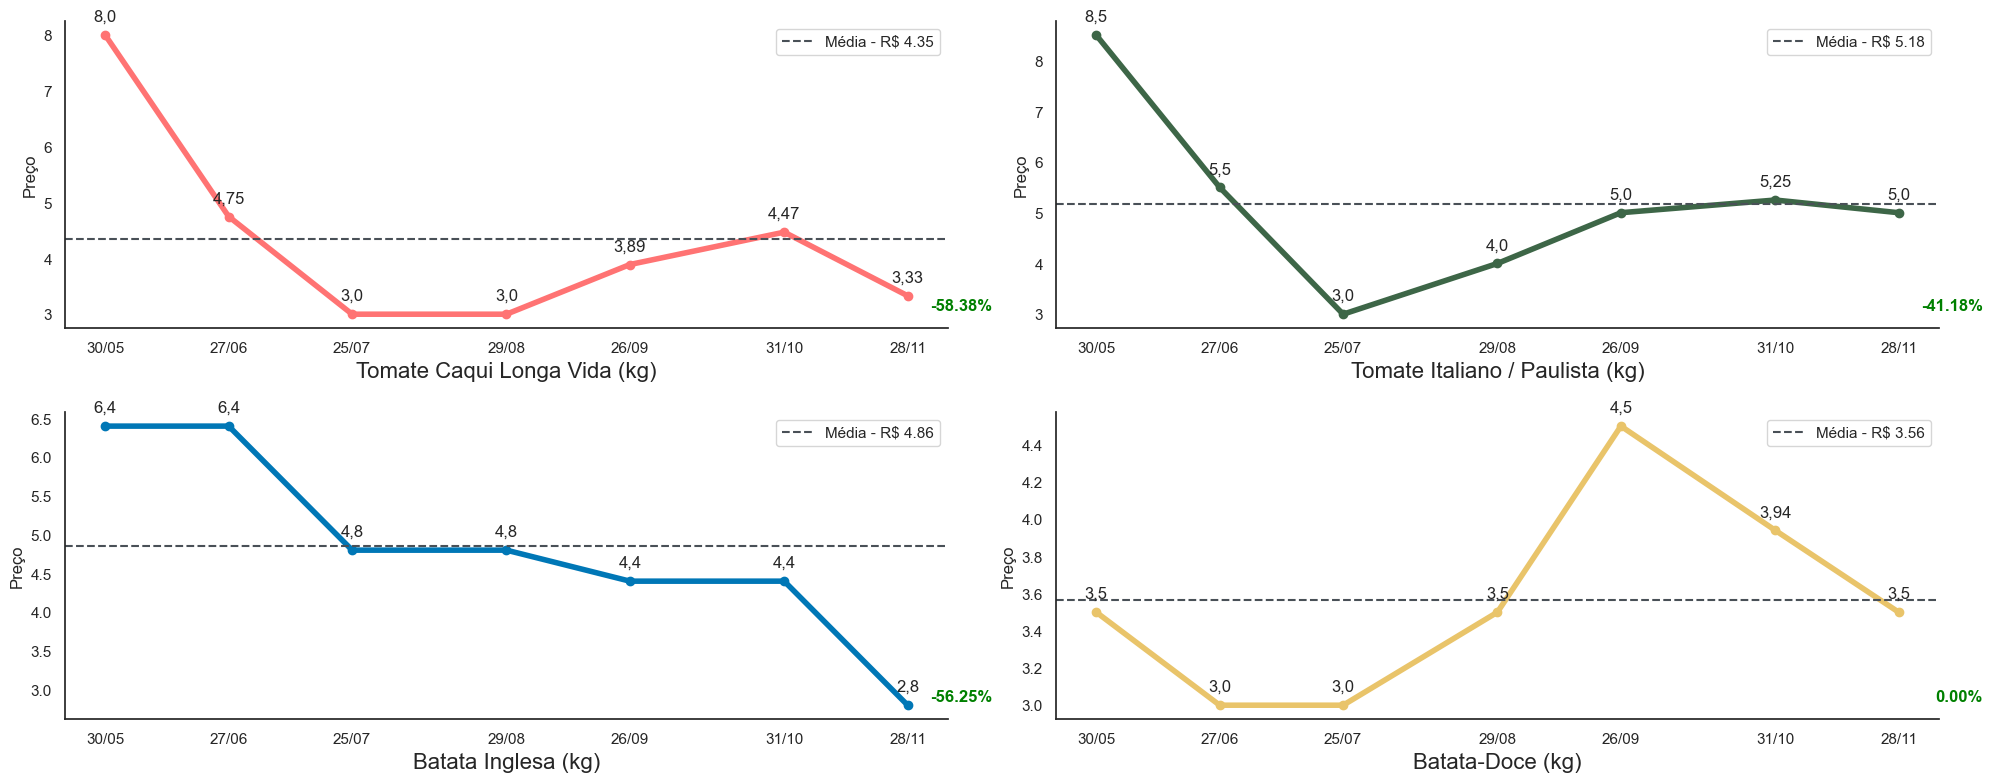

In [9]:
item =  [folhosas ,brassicas, frutas_tropicas ,frutas_diversas ,grandes_volumes ,diversos_produtos]
produtos = item[4]
for i in range(0, len(produtos), 4):
	produto01 = produtos[i]
	produto02 = produtos[i + 1] if i + 1 < len(produtos) else None
	produto03 = produtos[i + 2] if i + 2 < len(produtos) else None
	produto04 = produtos[i + 3] if i + 3 < len(produtos) else None

	if None not in [produto01, produto02, produto03, produto04]:
		saida = gerar_grafico_selecionados(produto01, produto02, produto03, produto04, dados)
		saida.show()


### Cotação Média

In [5]:
df_cotacao_media = df_cotacao.copy(deep=True)
df_cotacao_media['ANO'] = df_cotacao_media['DATA'].dt.year
df_cotacao_media['MES'] = df_cotacao_media['DATA'].dt.month
df_cotacao_media = df_cotacao_media.drop(columns=['MÁXIMO', 'MINIMO','DATA'])
df_cotacao_media = df_cotacao_media.groupby(['ANO','MES','PRODUTO','UNIDADE'])['MAIS FREQUENTE'].mean().reset_index()
df_cotacao_media

NameError: name 'df_cotacao' is not defined

In [16]:
%%sql
CALL cotacaoEmQuilogramasPorPeriodo('2024-01-01','2024-12-31')

,data,produto,unidade,mais_frequente,peso em KG,Preço por Kg
0,2024-01-04,00101-ABACATE,KG,5.00,1.00,5.00
1,2024-01-04,00201-ABACAXI CAIENA (HAWAI),UND,9.00,1.80,5.00
2,2024-01-04,00202-ABACAXI PEROLA,UND,8.00,1.30,6.15
3,2024-01-04,00203-ABACAXI TERRA DE AREIA,UND,4.50,0.40,11.25
4,2024-01-04,00301-AMEIXA NACIONAL,KG,8.00,1.00,8.00
...,...,...,...,...,...,...
37646,2024-12-05,54601-ROSA VERMELHA 20UN,MOL,69.00,0.57,121.91
37647,2024-12-05,54701-MOSQUITINHO,MOL,30.00,0.30,100.00
37648,2024-12-05,54801-VERDES (SAMAMBAIA PRETA),MOL,24.00,0.50,48.00
37649,2024-12-05,54901-ROSA COLORIDA 20UN,MOL,65.00,0.60,108.33


In [17]:
peso = peso_kg.copy(deep=True)
peso['data'] = pd.to_datetime(peso['data'])
peso['ano'] = peso['data'].dt.year
peso['mes'] = peso['data'].dt.month
peso = peso.drop(columns=['data','peso em KG','mais_frequente'])
peso = peso[peso['Preço por Kg'] != 0]
peso = peso.groupby(['ano','mes','produto'])['Preço por Kg'].mean().reset_index()
peso

,ano,mes,produto,Preço por Kg
0,2024,1,00101-ABACATE,5.17
1,2024,1,00201-ABACAXI CAIENA (HAWAI),4.86
2,2024,1,00202-ABACAXI PEROLA,5.86
3,2024,1,00203-ABACAXI TERRA DE AREIA,11.25
4,2024,1,00301-AMEIXA NACIONAL,7.94
...,...,...,...,...
2341,2024,12,53602-LIRIO MOLHE,130.00
2342,2024,12,54601-ROSA VERMELHA 20UN,121.91
2343,2024,12,54701-MOSQUITINHO,100.00
2344,2024,12,54801-VERDES (SAMAMBAIA PRETA),48.00


## <font color='#008080'><u><b>Volume Comercializado</b></u></font>

In [10]:
df_volume = df_2024.copy(deep=True)

In [11]:
x = df_volume.groupby('mes')['volume'].sum()
x

mes
1    51613791.82
2    44182450.09
3    39744164.39
4    45485664.01
5     8017058.54
6    20151078.13
7    38789505.73
8    37626123.21
9    40266293.45
10   43964072.84
11   43385813.76
12   46220252.06
Name: volume, dtype: float64

### Volume Mensal

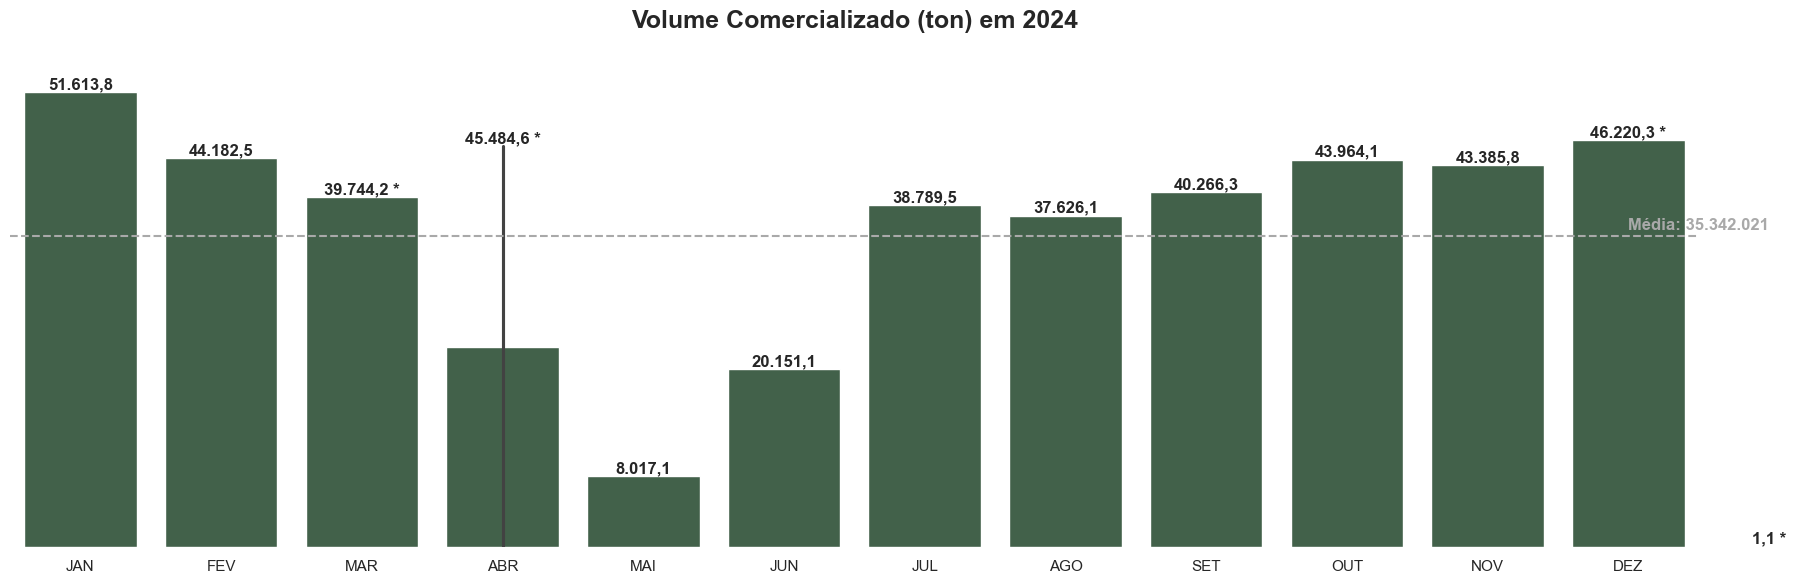

In [12]:
df_volume_mensal = df_volume.copy(deep=True)
df_volume_mensal = df_volume_mensal.groupby(['ano', 'mes'])['volume'].sum().reset_index()

meses = {
	1: 'JAN',
	2: 'FEV',
	3: 'MAR',
	4: 'ABR',
	5: 'MAI',
	6: 'JUN',
	7: 'JUL',
	8: 'AGO',
	9: 'SET',
	10: 'OUT',
	11: 'NOV',
	12: 'DEZ'
}

df_volume_mensal['mes'] = df_volume_mensal['mes'].map(meses)

sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(data=df_volume_mensal, x='mes', y='volume', color=VERDE2)

plt.title("Volume Comercializado (ton) em 2024", fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=30)
plt.ylabel('')
plt.xlabel('')
media_volume = df_volume_mensal['volume'].mean()
plt.axhline(y=media_volume, color='darkgrey', linestyle='--')

# Adicionar texto com a média ligeiramente acima da linha de média
media_formatada = f'{media_volume:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
plt.text(len(df_volume_mensal) - 1, media_volume + media_volume * 0.01, f'Média: {media_formatada}', color='darkgrey', ha='right', va='bottom', fontsize=12, fontweight='bold')

# Anotações em cada barra
for i in range(len(df_volume_mensal)):
	valor = df_volume_mensal['volume'][i]
	mes = df_volume_mensal['mes'][i]
	anotacao = f'{(valor / 1000):,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.') + (' *' if (mes == 'ABR' or mes == 'MAR' or mes == 'DEZ') else '')
	ax.text(i, valor, anotacao, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Estilizações do gráfico
ax.set(yticklabels=[])
ax.set(ylabel='')
sns.despine(bottom=True, left=True)

# Ajustar layout
plt.tight_layout()
plt.show()


In [13]:
df_volume_mensal = df_volume.copy(deep=True)
df_volume_mensal = df_volume_mensal.groupby(['ano', 'mes'])['volume'].sum().reset_index()

meses = {
	1: 'JAN',
	2: 'FEV',
	3: 'MAR',
	4: 'ABR',
	5: 'MAI',
	6: 'JUN',
	7: 'JUL',
	8: 'AGO',
	9: 'SET',
	10: 'OUT',
	11: 'NOV',
	12: 'DEZ'
}

df_volume_mensal['mes'] = df_volume_mensal['mes'].map(meses)
df_volume_mensal

,ano,mes,volume
0,2024,JAN,51613791.82
1,2024,FEV,44182450.09
2,2024,MAR,39744164.39
3,2024,ABR,45484555.48
4,2024,MAI,8017058.54
5,2024,JUN,20151078.13
6,2024,JUL,38789505.73
7,2024,AGO,37626123.21
8,2024,SET,40266293.45
9,2024,OUT,43964072.84


### Volume Semanal

In [14]:
df_volume_semanal = df_volume.copy(deep=True)
df_volume_semanal['Semana do ano'] = df_volume_semanal['data'].dt.isocalendar().week
meses = {
	1: 'JAN',
	2: 'FEV',
	3: 'MAR',
	4: 'ABR',
	5: 'MAI',
	6: 'JUN',
	7: 'JUL',
	8: 'AGO',
	9: 'SET',
	10: 'OUT',
	11: 'NOV',
	12: 'DEZ'
}
df_volume_semanal['mes'] = df_volume_semanal['mes'].map(meses)
df_volume_semanal = df_volume_semanal.groupby(['mes','Semana do ano'])['volume'].sum().reset_index()
df_volume_semanal = df_volume_semanal.sort_values(by=['Semana do ano'])
df_volume_semanal

,mes,Semana do ano,volume
10,DEZ,1,809550.64
20,JAN,1,8742593.38
21,JAN,2,10975970.13
22,JAN,3,14370819.14
23,JAN,4,10577360.19
24,JAN,5,6947048.97
15,FEV,5,2882846.92
16,FEV,6,12035986.19
17,FEV,7,9582994.73
18,FEV,8,9890573.85


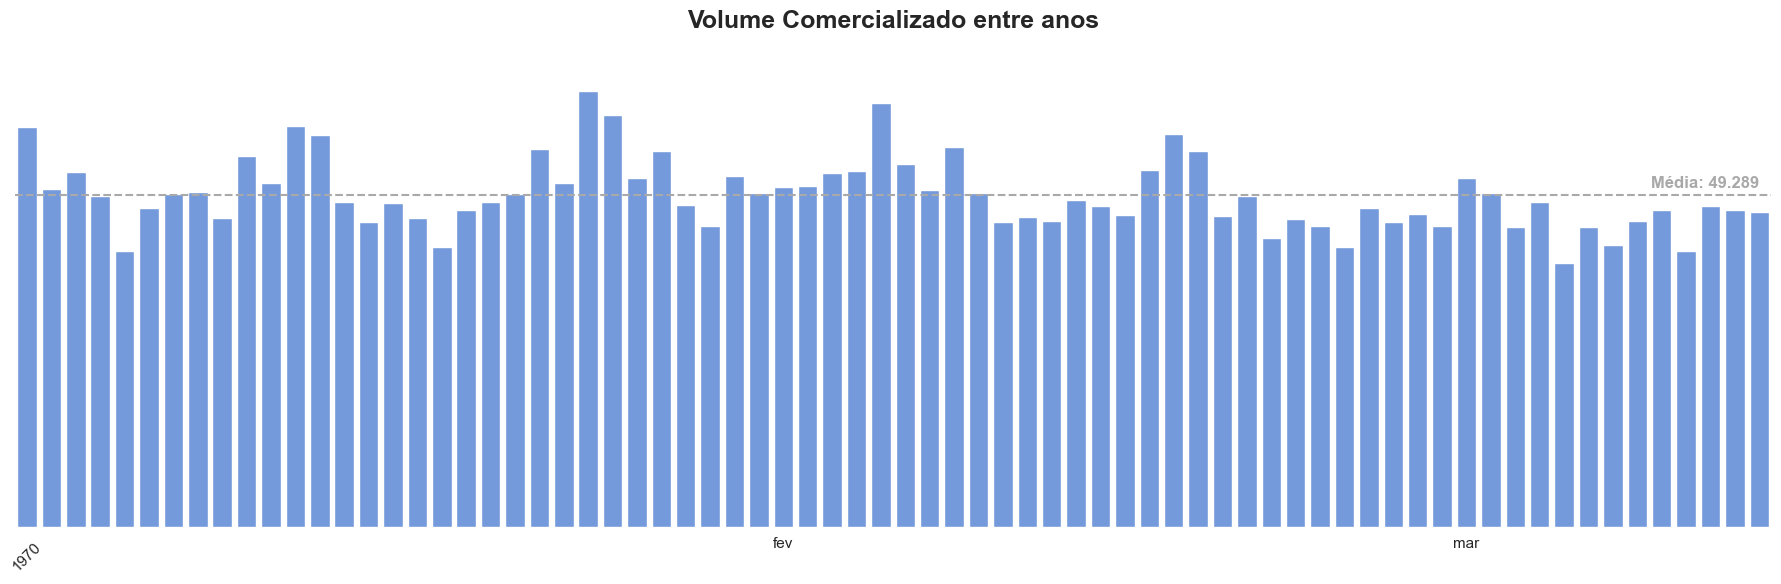

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Dados fornecidos
dados = {
	'data': [
		'01/01/2018', '01/02/2018', '01/03/2018', '01/04/2018', '01/05/2018', '01/06/2018', '01/07/2018', '01/08/2018', '01/09/2018', '01/10/2018', '01/11/2018', '01/12/2018',
		'01/01/2019', '01/02/2019', '01/03/2019', '01/04/2019', '01/05/2019', '01/06/2019', '01/07/2019', '01/08/2019', '01/09/2019', '01/10/2019', '01/11/2019', '01/12/2019',
		'01/01/2020', '01/02/2020', '01/03/2020', '01/04/2020', '01/05/2020', '01/06/2020', '01/07/2020', '01/08/2020', '01/09/2020', '01/10/2020', '01/11/2020', '01/12/2020',
		'01/01/2021', '01/02/2021', '01/03/2021', '01/04/2021', '01/05/2021', '01/06/2021', '01/07/2021', '01/08/2021', '01/09/2021', '01/10/2021', '01/11/2021', '01/12/2021',
		'01/01/2022', '01/02/2022', '01/03/2022', '01/04/2022', '01/05/2022', '01/06/2022', '01/07/2022', '01/08/2022', '01/09/2022', '01/10/2022', '01/11/2022', '01/12/2022',
		'01/01/2023', '01/02/2023', '01/03/2023', '01/04/2023', '01/05/2023', '01/06/2023', '01/07/2023', '01/08/2023', '01/09/2023', '01/10/2023', '01/11/2023', '01/12/2023'
	],
	'volume': [
		'59.357,9', '50.168,9', '52.679,9', '49.029,9', '40.921,0', '47.260,9', '49.428,2', '49.757,0', '45.892,8', '55.098,6', '51.013,0', '59.422,9',
		'58.166,6', '48.226,6', '45.191,7', '48.066,7', '45.902,9', '41.512,2', '47.067,2', '48.259,1', '49.460,2', '56.044,3', '51.002,9', '64.612,8',
		'61.121,7', '51.838,6', '55.736,8', '47.748,2', '44.626,2', '52.118,8', '49.583,1', '50.448,4', '50.511,6', '52.541,6', '52.760,4', '62.953,5',
		'53.839,3', '49.990,0', '56.317,4', '49.510,2', '45.258,8', '46.048,7', '45.320,0', '48.519,4', '47.623,4', '46.342,9', '52.907,9', '58.301,0',
		'55.784,7', '46.182,2', '49.149,0', '42.872,5', '45.671,9', '44.707,7', '41.490,8', '47.309,7', '45.268,9', '46.448,0', '44.608,1', '51.711,6',
		'49.515,3', '44.432,7', '48.248,2', '39.175,1', '44.456,5', '41.763,0', '45.424,5', '46.995,3', '40.872,6', '47.600,6', '46.971,5', '46.669,8'
	]
}

# Criar DataFrame
df_entre_anos = pd.DataFrame(dados)

# Converter a coluna 'data' para o formato datetime (formato brasileiro)
df_entre_anos['data'] = pd.to_datetime(df_entre_anos['data'], format='%d/%m/%Y')

# Converter a coluna 'volume' para float, substituindo o formato brasileiro
df_entre_anos['volume'] = df_entre_anos['volume'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Plotar o gráfico
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(data=df_entre_anos, x='data', y='volume', color='cornflowerblue')

plt.title("Volume Comercializado entre anos", fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=30)
plt.ylabel('')
plt.xlabel('')
media_volume = df_entre_anos['volume'].mean()
plt.axhline(y=media_volume, color='darkgrey', linestyle='--')

# Adicionar texto com a média ligeiramente acima da linha de média
media_formatada = f'{media_volume:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
plt.text(len(df_entre_anos) - 1, media_volume + media_volume * 0.01, f'Média: {media_formatada}', color='darkgrey', ha='right', va='bottom', fontsize=12, fontweight='bold')

# Ajustar as datas no eixo x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Rotacionar os labels no eixo x para melhor visualização
plt.xticks(rotation=45)

# Estilizações do gráfico
ax.set(yticklabels=[])
ax.set(ylabel='')
sns.despine(bottom=True, left=True)

# Ajustar layout
plt.tight_layout()
plt.show()


### Volume Entre Anos

In [15]:
import pandas as pd

# Dados fornecidos
dados = {
	'data': [
		'01/01/2018', '01/02/2018', '01/03/2018', '01/04/2018', '01/05/2018', '01/06/2018', '01/07/2018', '01/08/2018', '01/09/2018', '01/10/2018', '01/11/2018', '01/12/2018',
		'01/01/2019', '01/02/2019', '01/03/2019', '01/04/2019', '01/05/2019', '01/06/2019', '01/07/2019', '01/08/2019', '01/09/2019', '01/10/2019', '01/11/2019', '01/12/2019',
		'01/01/2020', '01/02/2020', '01/03/2020', '01/04/2020', '01/05/2020', '01/06/2020', '01/07/2020', '01/08/2020', '01/09/2020', '01/10/2020', '01/11/2020', '01/12/2020',
		'01/01/2021', '01/02/2021', '01/03/2021', '01/04/2021', '01/05/2021', '01/06/2021', '01/07/2021', '01/08/2021', '01/09/2021', '01/10/2021', '01/11/2021', '01/12/2021',
		'01/01/2022', '01/02/2022', '01/03/2022', '01/04/2022', '01/05/2022', '01/06/2022', '01/07/2022', '01/08/2022', '01/09/2022', '01/10/2022', '01/11/2022', '01/12/2022',
		'01/01/2023', '01/02/2023', '01/03/2023', '01/04/2023', '01/05/2023', '01/06/2023', '01/07/2023', '01/08/2023', '01/09/2023', '01/10/2023', '01/11/2023', '01/12/2023'
	],
	'volume': [
		'59.357,9', '50.168,9', '52.679,9', '49.029,9', '40.921,0', '47.260,9', '49.428,2', '49.757,0', '45.892,8', '55.098,6', '51.013,0', '59.422,9',
		'58.166,6', '48.226,6', '45.191,7', '48.066,7', '45.902,9', '41.512,2', '47.067,2', '48.259,1', '49.460,2', '56.044,3', '51.002,9', '64.612,8',
		'61.121,7', '51.838,6', '55.736,8', '47.748,2', '44.626,2', '52.118,8', '49.583,1', '50.448,4', '50.511,6', '52.541,6', '52.760,4', '62.953,5',
		'53.839,3', '49.990,0', '56.317,4', '49.510,2', '45.258,8', '46.048,7', '45.320,0', '48.519,4', '47.623,4', '46.342,9', '52.907,9', '58.301,0',
		'55.784,7', '46.182,2', '49.149,0', '42.872,5', '45.671,9', '44.707,7', '41.490,8', '47.309,7', '45.268,9', '46.448,0', '44.608,1', '51.711,6',
		'49.515,3', '44.432,7', '48.248,2', '39.175,1', '44.456,5', '41.763,0', '45.424,5', '46.995,3', '40.872,6', '47.600,6', '46.971,5', '46.669,8'
	]
}

# Criar DataFrame
df_entre_anos = pd.DataFrame(dados)

# Converter a coluna 'data' para o formato datetime (formato brasileiro)
df_entre_anos['data'] = pd.to_datetime(df_entre_anos['data'], format='%d/%m/%Y')

# Converter a coluna 'volume' para float, substituindo o formato brasileiro
df_entre_anos['volume'] = df_entre_anos['volume'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Exibir o DataFrame
df_entre_anos

,data,volume
0,2018-01-01,59357.90
1,2018-02-01,50168.90
2,2018-03-01,52679.90
3,2018-04-01,49029.90
4,2018-05-01,40921.00
...,...,...
67,2023-08-01,46995.30
68,2023-09-01,40872.60
69,2023-10-01,47600.60
70,2023-11-01,46971.50


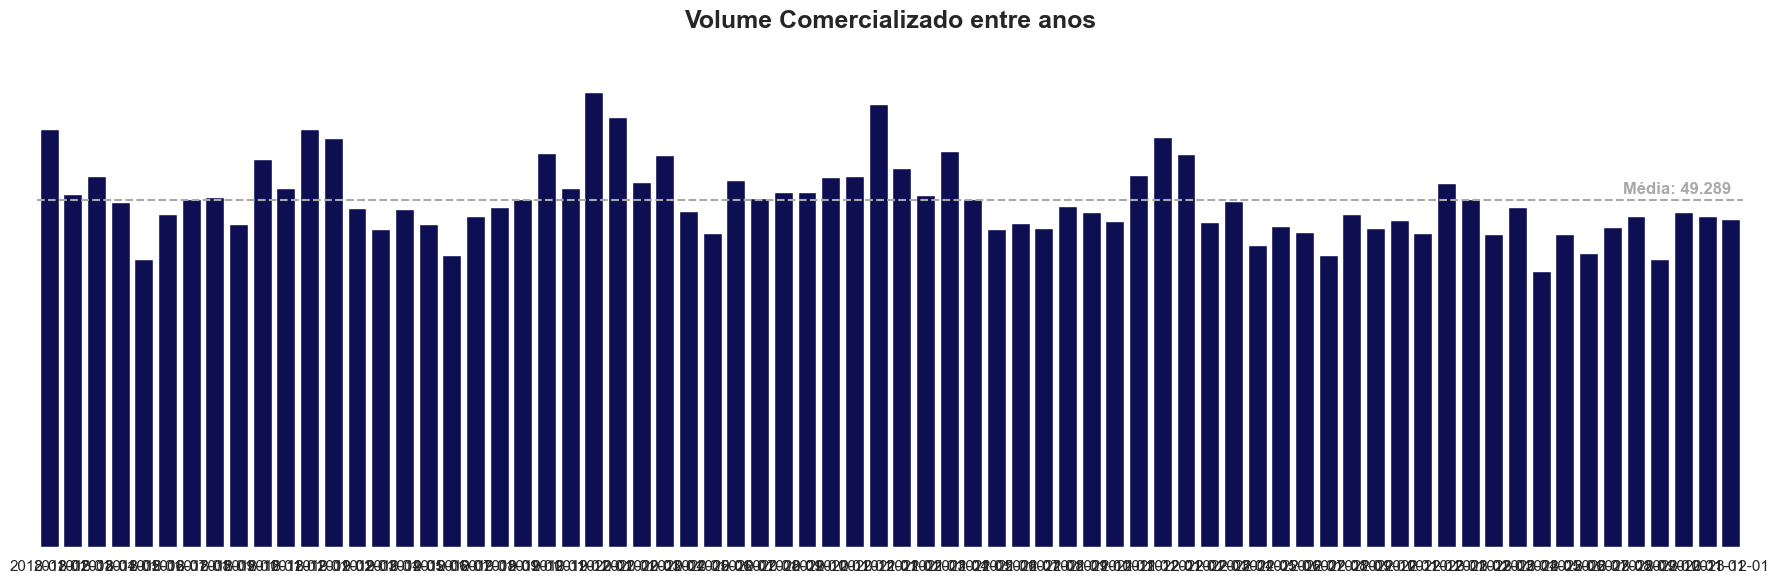

In [16]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(data=df_entre_anos, x='data', y='volume', color=AZUL1)

plt.title("Volume Comercializado entre anos", fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=30)
plt.ylabel('')
plt.xlabel('')
media_volume = df_entre_anos['volume'].mean()
plt.axhline(y=media_volume, color='darkgrey', linestyle='--')

# Adicionar texto com a média ligeiramente acima da linha de média
media_formatada = f'{media_volume:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
plt.text(len(df_entre_anos) - 1, media_volume + media_volume * 0.01, f'Média: {media_formatada}', color='darkgrey', ha='right', va='bottom', fontsize=12, fontweight='bold')

# Estilizações do gráfico
ax.set(yticklabels=[])
ax.set(ylabel='')
sns.despine(bottom=True, left=True)

# Ajustar layout
plt.tight_layout()
plt.show()


### Top 10

In [15]:
top_10 = df_2024.copy(deep=True)
top_10 = top_10.loc[top_10['mes'] == 11]
top_10 = top_10.groupby('produto')['volume'].sum().reset_index()
top_10 = top_10.nlargest(10, 'volume')
top_10['volume'] = top_10['volume'].apply(lambda x: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
top_10

,produto,volume
111,07404-TOMATE CAQUI LONGA VIDA,"5.330.519,00"
116,07701-BATATA INGLESA,"4.247.121,00"
42,02101-MELANCIA,"3.042.823,00"
24,01406-LARANJA SUCO,"1.906.413,00"
38,01802-MAMAO FORMOSA,"1.792.398,00"
9,00503-BANANA PRATA / BRANCA,"1.750.740,00"
2,00202-ABACAXI PEROLA,"1.737.490,40"
7,00501-BANANA CATURRA / NANICA,"1.710.200,00"
142,10101-BATATA-DOCE,"1.515.895,00"
40,01901-MANGA,"1.503.629,00"


## <font color='#008080'><u><b>Valor Comercializado</b></u></font>

In [23]:
valor_comercializado = df_2024.copy(deep=True)
valor_comercializado

,ano,mes,data,destino,numeroNotaFiscal,tipo_destino,tipo,procedencia,estado,produto,volume,tipo_final
0,2024,1,2024-01-02,0100003-TAKAYOSHI SATO,21096,PRODUTOR,PRODUTOR,0143057-GRAVATAI (RS),RIO GRANDE DO SUL,04801-CHEIRO VERDE / TEMPERO,10.00,PRODUTOR
1,2024,1,2024-01-02,0100037-YOSHIHIRO TAKEUCHI,190423,PRODUTOR,PRODUTOR,0143024-CANOAS (RS),RIO GRANDE DO SUL,04801-CHEIRO VERDE / TEMPERO,75.00,PRODUTOR
2,2024,1,2024-01-02,0100037-YOSHIHIRO TAKEUCHI,190423,PRODUTOR,PRODUTOR,0143024-CANOAS (RS),RIO GRANDE DO SUL,12301-FLORES COMESTIVEIS,0.75,PRODUTOR
3,2024,1,2024-01-02,0100043-ORLANDO LUIZ ESSVEIN,518140,PRODUTOR,PRODUTOR,0143149-TRIUNFO (RS),RIO GRANDE DO SUL,02101-MELANCIA,3000.00,PRODUTOR
4,2024,1,2024-01-02,0100058-NELSON MENGUE CARDOSO,51176,PRODUTOR,PRODUTOR,0143376-MORRINHOS DO SUL (RS),RIO GRANDE DO SUL,00503-BANANA PRATA / BRANCA,1000.00,PRODUTOR
...,...,...,...,...,...,...,...,...,...,...,...,...
257100,2024,12,2024-12-17,0115230-SILVIO HAHN JUSTO,RM1419,PRODUTOR,PRODUTOR,0143440-DOM PEDRO DE ALCANTARA (RS),RIO GRANDE DO SUL,00503-BANANA PRATA / BRANCA,800.00,PRODUTOR
257101,2024,12,2024-12-25,5500416-DICO COMERCIAL FR. E LEG,415466,ATACADISTA,ATACADISTA,0135503-SAO PAULO (SP),SAO PAULO,07203-PIMENTAO VERMELHO,100.00,ATACADISTA
257102,2024,12,2024-12-25,5500416-DICO COMERCIAL FR. E LEG,415466,ATACADISTA,ATACADISTA,0135503-SAO PAULO (SP),SAO PAULO,07204-PIMENTAO AMARELO,100.00,ATACADISTA
257103,2042,12,2042-12-05,0103033-RUDIMAR ANDRE BOFF,426985,PRODUTOR,PRODUTOR,0143029-CAXIAS DO SUL (RS),RIO GRANDE DO SUL,07802-BETERRABA,5600.00,PRODUTOR


In [24]:
valor_comercializado = valor_comercializado.merge(peso, on=['produto','ano','mes'] , how='left')
valor_comercializado

,ano,mes,data,destino,numeroNotaFiscal,tipo_destino,tipo,procedencia,estado,produto,volume,tipo_final,Preço por Kg
0,2024,1,2024-01-02,0100003-TAKAYOSHI SATO,21096,PRODUTOR,PRODUTOR,0143057-GRAVATAI (RS),RIO GRANDE DO SUL,04801-CHEIRO VERDE / TEMPERO,10.00,PRODUTOR,28.50
1,2024,1,2024-01-02,0100037-YOSHIHIRO TAKEUCHI,190423,PRODUTOR,PRODUTOR,0143024-CANOAS (RS),RIO GRANDE DO SUL,04801-CHEIRO VERDE / TEMPERO,75.00,PRODUTOR,28.50
2,2024,1,2024-01-02,0100037-YOSHIHIRO TAKEUCHI,190423,PRODUTOR,PRODUTOR,0143024-CANOAS (RS),RIO GRANDE DO SUL,12301-FLORES COMESTIVEIS,0.75,PRODUTOR,300.00
3,2024,1,2024-01-02,0100043-ORLANDO LUIZ ESSVEIN,518140,PRODUTOR,PRODUTOR,0143149-TRIUNFO (RS),RIO GRANDE DO SUL,02101-MELANCIA,3000.00,PRODUTOR,1.65
4,2024,1,2024-01-02,0100058-NELSON MENGUE CARDOSO,51176,PRODUTOR,PRODUTOR,0143376-MORRINHOS DO SUL (RS),RIO GRANDE DO SUL,00503-BANANA PRATA / BRANCA,1000.00,PRODUTOR,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257100,2024,12,2024-12-17,0115230-SILVIO HAHN JUSTO,RM1419,PRODUTOR,PRODUTOR,0143440-DOM PEDRO DE ALCANTARA (RS),RIO GRANDE DO SUL,00503-BANANA PRATA / BRANCA,800.00,PRODUTOR,4.75
257101,2024,12,2024-12-25,5500416-DICO COMERCIAL FR. E LEG,415466,ATACADISTA,ATACADISTA,0135503-SAO PAULO (SP),SAO PAULO,07203-PIMENTAO VERMELHO,100.00,ATACADISTA,9.00
257102,2024,12,2024-12-25,5500416-DICO COMERCIAL FR. E LEG,415466,ATACADISTA,ATACADISTA,0135503-SAO PAULO (SP),SAO PAULO,07204-PIMENTAO AMARELO,100.00,ATACADISTA,9.00
257103,2042,12,2042-12-05,0103033-RUDIMAR ANDRE BOFF,426985,PRODUTOR,PRODUTOR,0143029-CAXIAS DO SUL (RS),RIO GRANDE DO SUL,07802-BETERRABA,5600.00,PRODUTOR,NaN


In [25]:
valor_comercializado['Preço por Kg'] = valor_comercializado['Preço por Kg'].fillna(0)

In [26]:
valor_comercializado['valor comercializado'] = valor_comercializado['volume'] * valor_comercializado['Preço por Kg']
valor_comercializado = valor_comercializado.groupby('mes')['valor comercializado'].sum()
valor_comercializado

mes
1    260736529.68
2    215191429.70
3     92795268.74
4            0.00
5     47075546.87
6    112716911.95
7    196094153.44
8    185932188.81
9    196996258.11
10   217086384.26
11   209452941.66
12    90867193.83
Name: valor comercializado, dtype: float64

In [50]:
valor_comercializado.to_excel('Valores 2024.xlsx')

### Valor Comercializado Mensalmente

## <font color='#008080'><u><b>Origem dos Produtos Comercializados<b></u></font>

In [18]:
procedencia = df_2024.copy(deep=True)

produto_selecionado = '01802-MAMAO FORMOSA'

procedencia = procedencia.loc[procedencia['mes'] == 11]
procedencia = procedencia.groupby(['estado','produto'])['volume'].sum().reset_index()
procedencia = procedencia.loc[procedencia['produto'] == produto_selecionado]
procedencia

,estado,produto,volume
11,BAHIA,01802-MAMAO FORMOSA,97234.00
53,ESPIRITO SANTO,01802-MAMAO FORMOSA,1150058.00
98,MINAS GERAIS,01802-MAMAO FORMOSA,71156.00
136,PERNAMBUCO,01802-MAMAO FORMOSA,400.00
187,RIO GRANDE DO SUL,01802-MAMAO FORMOSA,299592.00
348,SAO PAULO,01802-MAMAO FORMOSA,173958.00


In [16]:
def remover_acentos(texto):
	return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')

# Supondo que read_state() é uma função que carrega o GeoDataFrame de estados brasileiros
geo_estados = read_state()
geo_estados = geo_estados[['name_state','geometry']]
geo_estados.columns = ['estado', 'geometry']
geo_estados['estado'] = geo_estados['estado'].apply(lambda x: x.upper())
geo_estados['estado'] = geo_estados['estado'].apply(remover_acentos)

# Juntando o DataFrame e o GeoDataFrame
geo_data_df = geo_estados.merge(procedencia[['estado', 'volume']], on='estado', how='left')
geo_data_df['volume'] = geo_data_df['volume'].fillna(0)

# Mapa Geográfico
cmap = 'cividis'  # Escolha um colormap contínuo

# Crie o gráfico coroplético
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis('off')

# Use o cmap e aplique o degradê de cores com base nos valores comerciais
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

geo_data_df.plot(column='volume', cmap=cmap, legend=True, legend_kwds={'shrink': 0.3, 'cax': cax}, alpha=0.75, ax=ax)
geo_data_df.boundary.plot(ax=ax, color='grey', linewidth=0.3)

# Adicione um título ao gráfico
# ax.set_title(f"Origem do {(produto_selecionado[6:]).capitalize()}\n em Kg Comercializado na CEASA Porto Alegre", fontdict={"fontsize": 16})

# Adicione uma legenda ao lado
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=geo_data_df['volume'].min(), vmax=geo_data_df['volume'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Volume por Estado (Kg)')  # Rótulo da legenda

# Exiba o gráfico
plt.show()


NameError: name 'procedencia' is not defined

### RS x Demais estados e Países

## <font color='#008080'><u><b>Relação Produtores e Atacadistas no Período Analisado</b></u></font>

In [20]:
prod_atac = df_2024.copy(deep=True)

In [21]:
prod_atac.groupby(['tipo'])['volume'].sum()

tipo
ATACADISTA   218796805.67
PRODUTOR     115656890.65
Name: volume, dtype: float64

### Relação Volume Produtor e Volume Atacadista

In [22]:
vol_atac = df_2024.copy(deep=True)
vol_atac = vol_atac.loc[(vol_atac['tipo'] == 'ATACADISTA') & (vol_atac['mes'] == 11)]
vol_atac['dia da semana'] = vol_atac['data'].dt.isocalendar().week
vol_atac_semanal = vol_atac.groupby(['dia da semana'])['volume'].sum().reset_index()
vol_atac_semanal

,dia da semana,volume
0,44,876289.70
1,45,8114844.48
2,46,7549841.51
3,47,7986384.15
4,48,7625592.65


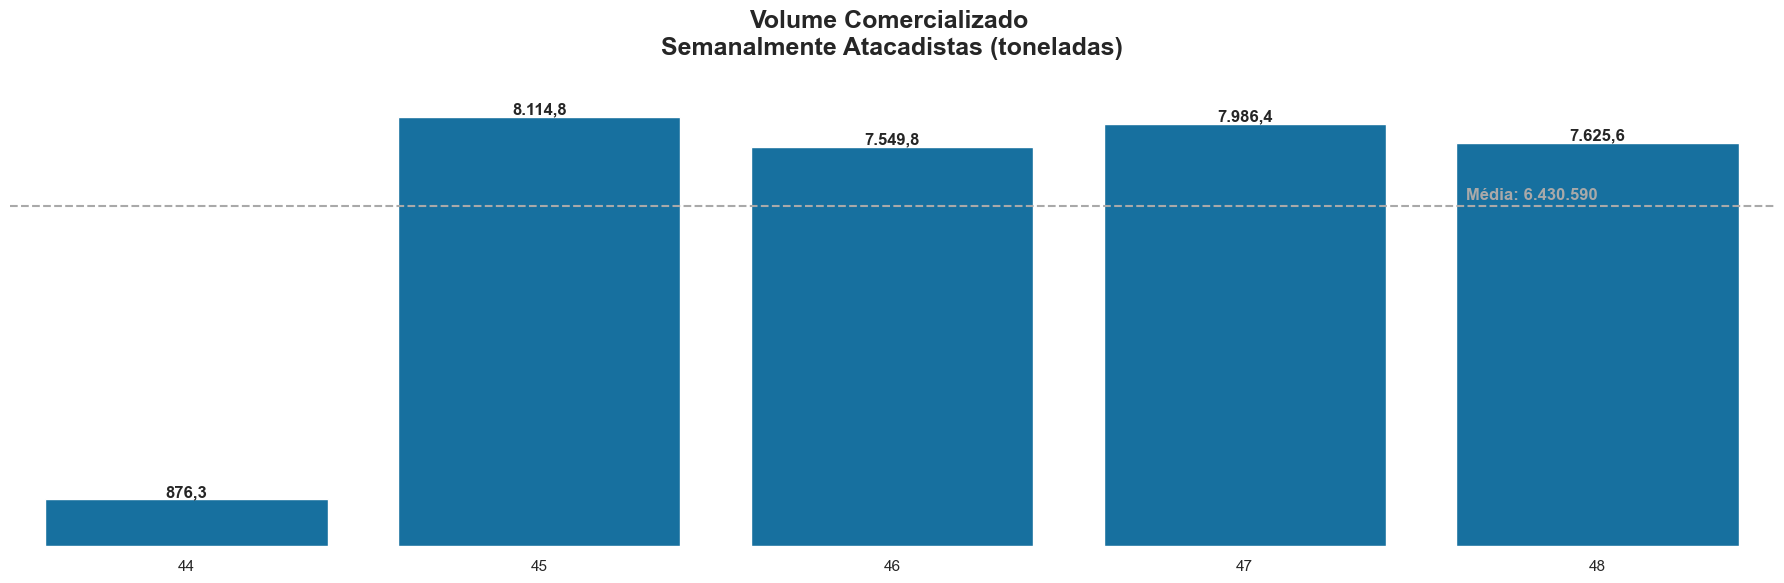

In [23]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(data=vol_atac_semanal, x='dia da semana', y='volume', color=AZUL2)

plt.title("Volume Comercializado \nSemanalmente Atacadistas (toneladas)", fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=30)
plt.ylabel('')
plt.xlabel('')
media_volume = vol_atac_semanal['volume'].mean()
plt.axhline(y=media_volume, color='darkgrey', linestyle='--')

# Adicionar texto com a média ligeiramente acima da linha de média
media_formatada = f'{media_volume:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
plt.text(len(vol_atac_semanal) - 1, media_volume + media_volume * 0.01, f'Média: {media_formatada}', color='darkgrey', ha='right', va='bottom', fontsize=12, fontweight='bold')

# Anotações em cada barra
for i in range(len(vol_atac_semanal)):
	valor = vol_atac_semanal['volume'][i]
	mes = vol_atac_semanal['dia da semana'][i]
	anotacao = f'{(valor / 1000):,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.') + (' *' if (mes == 'ABR' or mes == 'MAR' or mes == 'DEZ') else '')
	ax.text(i, valor, anotacao, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Estilizações do gráfico
ax.set(yticklabels=[])
ax.set(ylabel='')
sns.despine(bottom=True, left=True)

# Ajustar layout
plt.tight_layout()
plt.show()


In [36]:
vol_produtores = df_2024.copy(deep=True)
vol_produtores = vol_produtores.loc[(vol_produtores['tipo'] == 'PRODUTOR') & (vol_produtores['mes'] == 11)]
vol_produtores['dia da semana'] = vol_produtores['data'].dt.isocalendar().week
vol_produtores = vol_produtores.groupby(['dia da semana'])['volume'].sum().reset_index()
vol_produtores

,dia da semana,volume
0,44,114665.62
1,45,2605971.04
2,46,2543306.43
3,47,2729545.89
4,48,3238967.16


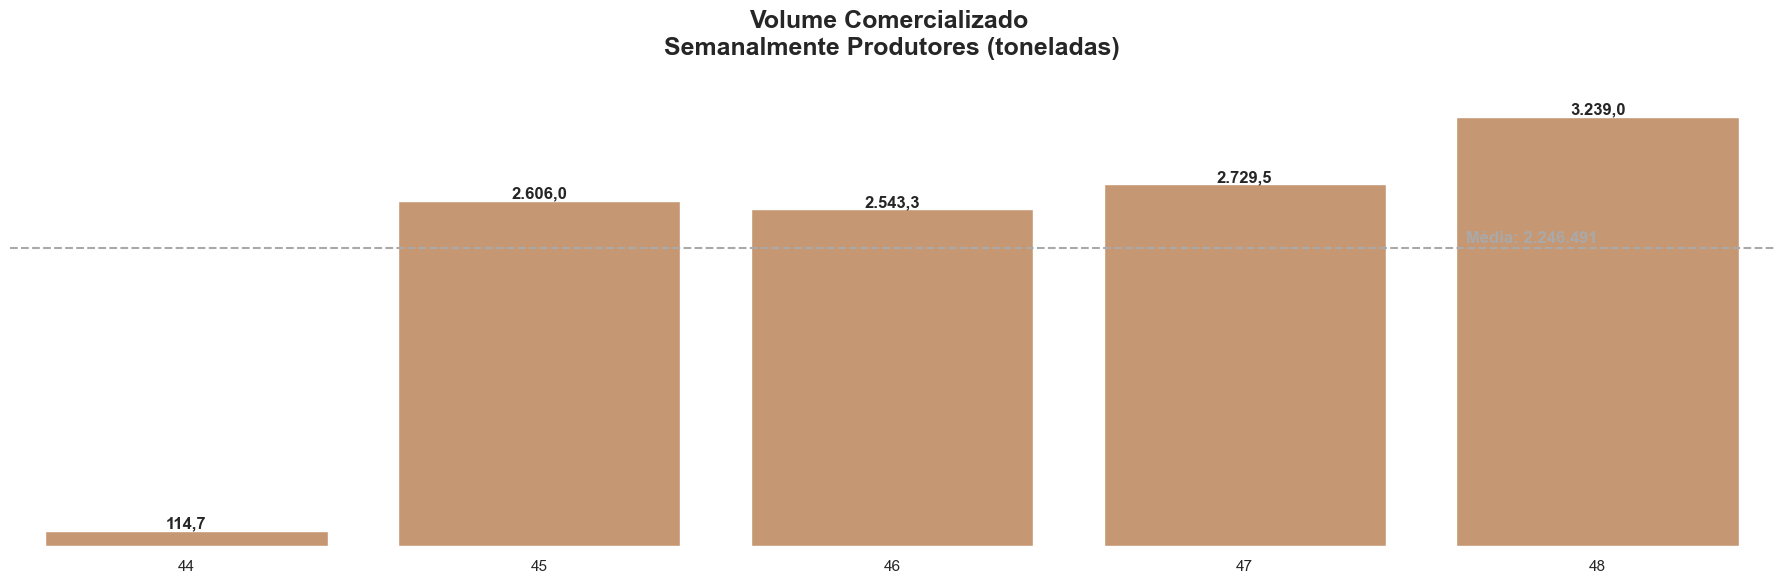

In [40]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.barplot(data=vol_produtores, x='dia da semana', y='volume', color=DESTAQUE01)

plt.title("Volume Comercializado \nSemanalmente Produtores (toneladas)", fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=30)
plt.ylabel('')
plt.xlabel('')
media_volume = vol_produtores['volume'].mean()
plt.axhline(y=media_volume, color='darkgrey', linestyle='--')

# Adicionar texto com a média ligeiramente acima da linha de média
media_formatada = f'{media_volume:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
plt.text(len(vol_produtores) - 1, media_volume + media_volume * 0.01, f'Média: {media_formatada}', color='darkgrey', ha='right', va='bottom', fontsize=12, fontweight='bold')

# Anotações em cada barra
for i in range(len(vol_produtores)):
	valor = vol_produtores['volume'][i]
	mes = vol_produtores['dia da semana'][i]
	anotacao = f'{(valor / 1000):,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.') + (' *' if (mes == 'ABR' or mes == 'MAR' or mes == 'DEZ') else '')
	ax.text(i, valor, anotacao, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Estilizações do gráfico
ax.set(yticklabels=[])
ax.set(ylabel='')
sns.despine(bottom=True, left=True)

# Ajustar layout
plt.tight_layout()
plt.show()


### Principais produtos GNP

### Principais Produtos Atacadistas

## <font color='#008080'><u><b>Produtos</b></u></font>

### Relação Produtos por Categoria durante o Ano de 2024